In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns; sns.set(style='ticks', color_codes=True)

from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from operator import itemgetter 

In [2]:
#Distance calculation

def bhattacharyyan_distance(v1, v2):
    if len(v1) != len(v2):
        return -1
    
    return sum([math.sqrt(v1[i] * v2[i]) for i in range(0, len(v1))])

def euclidean_distance(v1,v2):
    if len(v1) != len(v2):
        return -1
    
    return math.sqrt(sum((v1[i]-v2[i])**2 for i in range(0, len(v1))))

In [3]:
#Normalization

def normalize_max_known(base_df, max_val_list):
    df = base_df.copy()

    col_size = len(df.columns)
    for i in range(0, col_size):
        max_val = max_val_list[i]
        vector = df.iloc[:,i]
        
        df.iloc[:,i] = [x/float(max_val) for x in vector]
        
    return df
    

def normalize_max_unknown(base_df):
    df = base_df.copy()
    
    col_size = len(df.columns)
    for i in range(0, col_size):
        vector = df.iloc[:,i]
        min = np.min(vector)
        max = np.max(vector)
        
        df.iloc[:,i] = [(x - float(min)) / (float(max) - float(min)) for x in vector]
        
    return df

def normalize_time_series(base_df):
    df = base_df.copy()
    mean_list = list()
    stdev_list = list()
    
    for i in range(0, len(df)):
        vector = df.iloc[i].values
        
        mean = np.mean(vector)
        stdev = np.std(vector, ddof=1)
        mean_list.append(mean)
        stdev_list.append(stdev)
        
        df.iloc[i] = [(x - mean) / stdev for x in vector]
        
    return df
#     return df, mean_list, stdev_list

In [4]:
#Data Visualization

def parallel_lines(df, target_category):
    plt.pyplot.figure(figsize=(30,10))

    parallel_plt = parallel_coordinates(df, target_category)
    plt.pyplot.savefig('%s_parallel.png' % target_category)
    
def scatter_plot(df, target_category):
    scatter_plt = sns.pairplot(df, hue=target_category)
    scatter_plt.savefig('%s_scatter.png' % target_category)

In [5]:
#Naive Bayes

class NaiveBayes(object):
    
    def __init__(self):
        self.label_ratio = list()
        self.mean_variance_dict = {}
    
    def train(self, data, label, label_name):
        #Compute for classification ratio - P(A) = P(0), P(A) = P(1)
#         self.label_ratio.append(label.count(0) / len(label))
#         self.label_ratio.append(label.count(1) / len(label))
        
        unique, counts = np.unique(label, return_counts=True)
        label_count_dict = dict(zip(unique, counts))
        self.label_ratio.append(label_count_dict[0])
        self.label_ratio.append(label_count_dict[1])

        zero_data = data.loc[data[label_name] == 0]
        one_data = data.loc[data[label_name] == 1]
        
        for column in zero_data:
            mean = np.mean(zero_data[column])
            variance = np.var(zero_data[column])
            self.mean_variance_dict[0] = {'mean':{column:mean}}
            self.mean_variance_dict[0] = {'variance':{column:variance}}

            
        for column in one_data:
            mean = np.mean(one_data[column])
            variance = np.var(one_data[column])
            self.mean_variance_dict[1] = {'mean':{column:mean}}
            self.mean_variance_dict[1] = {'variance':{column:variance}}
        
df = pd.read_csv('sample_data.csv')
clf = NaiveBayes().train(df, df['y'].values, 'y')

In [6]:
v1 = df.loc[0]
v2 = df.loc[1]

euclidean_distance(v1,v2)

0.45128684260947494

In [13]:
sample = pd.read_csv('lt1.csv')
sample

,x1,x2,x3,y
0,2,6,1,1
1,1,5,0,1
2,2,6,1,1
3,12,2,1,0
4,9,1,0,0
5,7,2,1,0


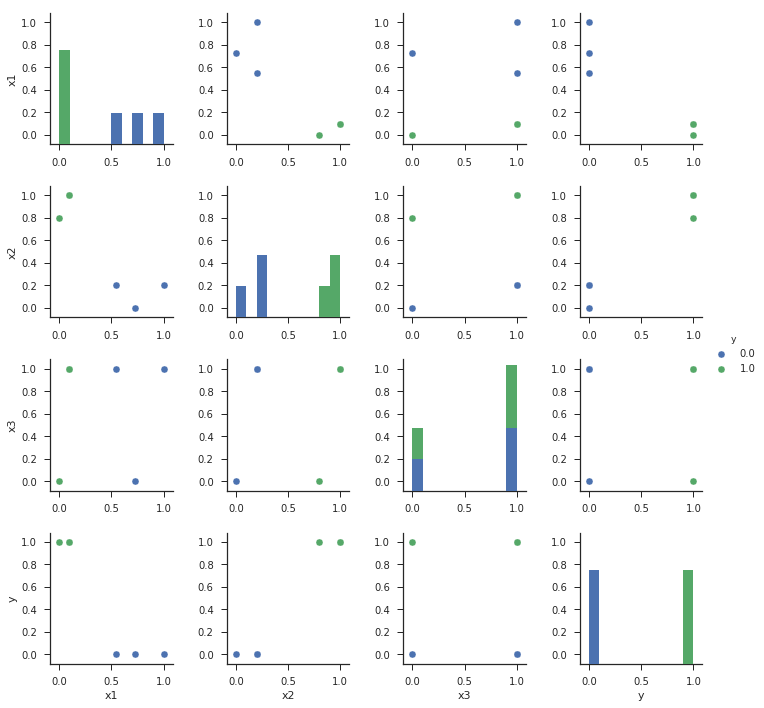

In [15]:
normalized1 = normalize_max_unknown(sample)
scatter_plot(normalized1, 'y')

In [9]:
normalized2 = normalize_max_known(sample, [5,5,3,1])
normalized2

,x1,x2,x3,Label
0,0.6,0.4,0.333333,0.0
1,0.2,0.4,1.000000,1.0
2,1.0,0.2,0.666667,0.0
3,0.4,1.0,0.333333,0.0
4,0.2,0.2,1.000000,1.0


In [10]:
normalize3 = normalize_time_series(sample)
normalize3

,x1,x2,x3,Label
0,1.161895,0.387298,-0.387298,-1.161895
1,-0.783349,0.261116,1.305582,-0.783349
2,1.388730,-0.462910,0.000000,-0.925820
3,0.000000,1.388730,-0.462910,-0.925820
4,-0.500000,-0.500000,1.500000,-0.500000
